In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


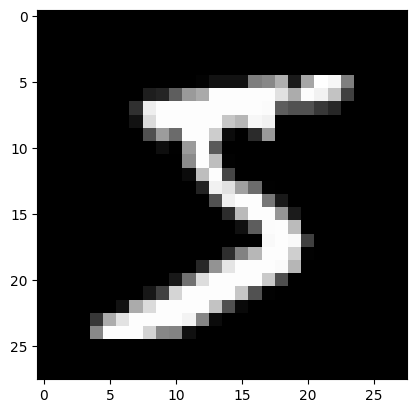

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8629 - loss: 0.4464 - val_accuracy: 0.9617 - val_loss: 0.1182
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9665 - loss: 0.1064 - val_accuracy: 0.9736 - val_loss: 0.0870
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9783 - loss: 0.0702 - val_accuracy: 0.9769 - val_loss: 0.0773
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9818 - loss: 0.0559 - val_accuracy: 0.9798 - val_loss: 0.0650
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9872 - loss: 0.0396 - val_accuracy: 0.9819 - val_loss: 0.0653
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9820 - val_loss: 0.0672
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9802 - val_loss: 0.0743
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9901 - loss: 0.0302 - va

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0832606703042984
Test accuracy: 0.9851999878883362
